In [1]:
import numpy as np
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
D = 10000
N = 1000
thresh = np.round(np.arange(0,0.500001,0.05)*D)

In [3]:
def bipolarize(X):
    X[X > 0] = 1.0
    X[X < 0] = -1.0
    X[X == 0] = np.random.choice([-1.0, 1.0], size=len(X[X == 0]))
    return X

In [27]:
t = 3000
N = 50
X = np.random.choice([-1.0, 1.0], size=D).reshape(1,-1)
centroids = bipolarize(np.sum(X,axis=0)).reshape(1,-1)
while X.shape[0] < N:
    new = np.copy(centroids[-1]).reshape(1,-1)
    idx = np.random.permutation(D)[:t]
    new[0,idx] = -new[0,idx]
    
    X = np.concatenate((X,new))
    
    newCentroid = bipolarize(np.sum(X,axis=0)).reshape(1,-1)
    centroids = np.concatenate((centroids,newCentroid))

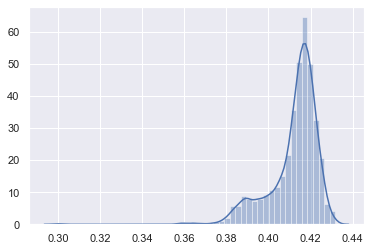

In [28]:
Xdist = pdist(X,metric='hamming')
sns.set()
sns.distplot(Xdist)
plt.show()

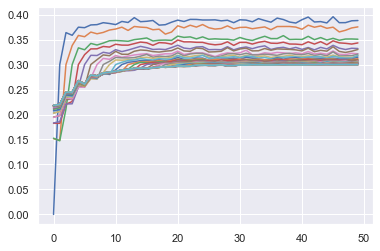

In [29]:
Xdist = cdist(X,centroids,metric='hamming')
sns.set()
plt.plot(Xdist)
plt.show()

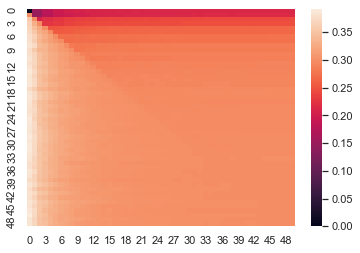

In [19]:
sns.set()
sns.heatmap(Xdist)
plt.show()

In [24]:
Xdist[-1]

array([0.3856, 0.3711, 0.3504, 0.3454, 0.3354, 0.3292, 0.3247, 0.3202,
       0.3159, 0.3125, 0.3107, 0.3094, 0.3074, 0.3071, 0.306 , 0.3066,
       0.3055, 0.3051, 0.3048, 0.3044, 0.3039, 0.3035, 0.3025, 0.3022,
       0.302 , 0.3028, 0.3027, 0.3016, 0.3012, 0.3011, 0.3009, 0.3009,
       0.301 , 0.3001, 0.3003, 0.3003, 0.3001, 0.3   , 0.3002, 0.3001,
       0.3002, 0.3003, 0.3003, 0.3001, 0.3001, 0.3   , 0.3   , 0.3   ,
       0.3   , 0.2998])

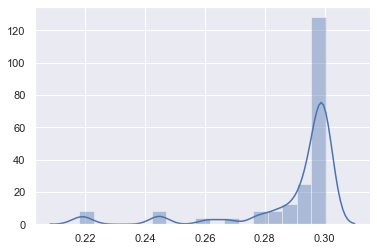

In [34]:
Xdist = cdist(X,centroids[-10].reshape(1,-1),metric='hamming')
sns.set()
sns.distplot(Xdist)
plt.show()

In [17]:
centroids[-1].shape

(10000,)

In [3]:
import pickle
with open('./clusters/hdc_run_'+'0'+'.pickle','rb') as f:
    test = pickle.load(f)

In [4]:
test

{'tRange': array([0.5703125, 0.6328125, 0.6953125]),
 'standardOrder': [array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
  array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
  array([0, 0, 0, ..., 2, 2, 2], dtype=int32)],
 'randPos': [[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
   array([2, 2, 2, ..., 1, 1, 1], dtype=int32),
   array([2, 2, 2, ..., 1, 1, 1], dtype=int32)],
  [array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
   array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
   array([3, 3, 3, ..., 7, 7, 7], dtype=int32)]],
 'randAll': [[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
   array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
   array([4, 4, 4, ..., 0, 0, 0], dtype=int32)],
  [array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
   array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
   array([1, 1, 1, ..., 3, 3, 3], dtype=int32)]]}